In [61]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error as root_mean_squared_error

In [62]:
# step 1 : load data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print("Dataset (first 5 rows) : \n",df.head())
print("\n")
print("Dataset (last 5 rows) : \n",df.tail())

Dataset (first 5 rows) : 
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


Dataset (last 5 rows) : 
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Price
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09  0.781
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21  0.771
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22  0.923
20638  1.8672      

In [63]:
# step 2 : EDA
print("Dataset (shape) : \n",df.shape)
print("\n")
print("Dataset (info) : \n",df.info())
print("\n")
print("Summary Statistics (describe) : \n",df.describe())
print("\n")
print("Check null values : \n",df.isnull().sum())

Dataset (shape) : 
 (20640, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Dataset (info) : 
 None


Summary Statistics (describe) : 
              MedInc      HouseAge      AveRooms  ...      Latitude     Longitude         Price
count  20640.000000  20640.000000  20640.000000  ...  20640.000000  20640.000000  20640.000000
mean       3.870671     28.639486      5.429000  ...     35.631861   -119.569704      2.068558
std        1.899822    

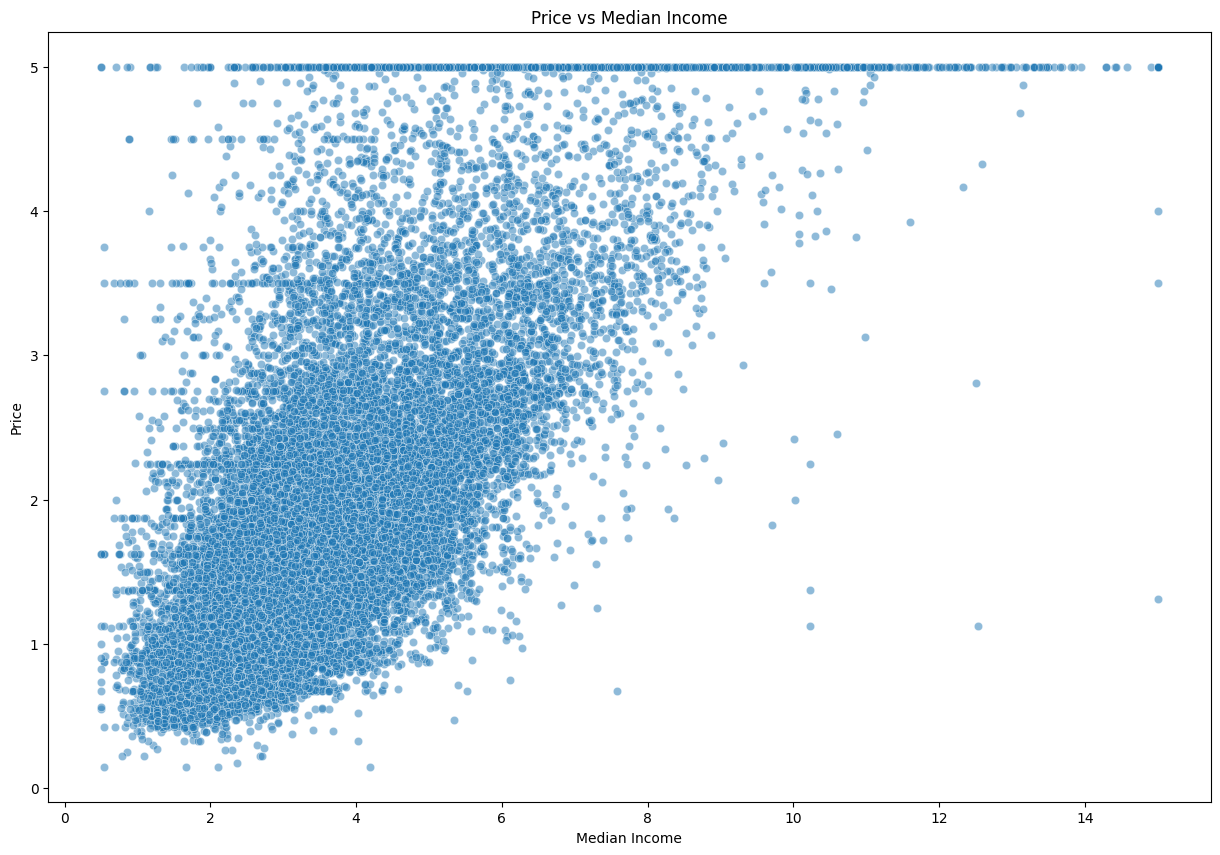

In [64]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Price vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.show()

In [65]:
print("Correlation with Price : \n",df.corr()['Price'].sort_values())

Correlation with Price : 
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


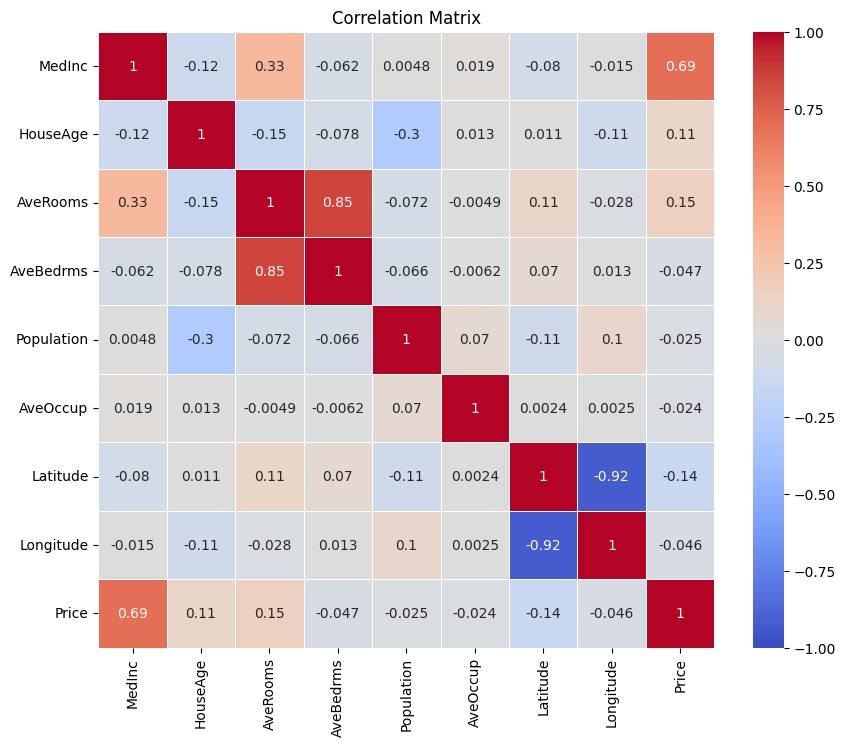

In [66]:
# calculate correlation matrix
corr_matrix = df.corr()
# create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1,vmax=1,center =0,square=True,linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [67]:
# def LR(x,y):


#   mean = 0
#   num =0
#   de =0
#   for i in range(len(x)):
#     num += (x[i] - meanx) * (y[i] - meany)
#     de += (x[i] - meanx)**2
#   mean += num/de
#   c = meany - mean*meanx
#   return mean,c

# def predict (x):
#   y_pred =[]
#   for i in range(len(x)):
#     y_p = x[i]*mean + c
#     y_pred.append(y_p)
#   return y_pred

# def r2(y,y_pred):
#   numr =0
#   der=0
#   for i in range(len(y)):
#     numr += (y_pred[i] - meany)**2
#     der += (y[i] - meany)**2
#   error_rate = numr/der
#   return error_rate

# meanx = sum(x)/len(x)
# meany = sum(y)/len(y)
# x = df['MedInc']
# y = df['Price']
# mean,c = LR(x,y)
# print(f"meany = {meany:.2f}")
# print(f"y = {mean:.2f}x + {c:.2f}")
# p = predict(x)
# print(f"predicted values : {p}")
# err = r2(y,p)
# print(f"error rate : {err:.2f}")
# accuracy = 1- err
# print(f"accuracy : {accuracy:.2f}")


In [68]:
# prepare data
x=df[['MedInc']]
y = df [['Price']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
# linear regression
model = LinearRegression()
model.fit(x_train,y_train)
coef = model.coef_[0]
intercept = model.intercept_
print(f"\n Linear equation : y = {coef[0]:.2f} * MedInc + {intercept[0]:.2f}")


 Linear equation : y = 0.42 * MedInc + 0.44


In [72]:
# Predict and Evaluate
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error : {mse:.2f} $100K")
print(f"Mean Absolute Error : {mae:.2f} $100K")
print(f"Root Mean Squared Error : {rmse:.2f} $100K")
print(f"R-squared : {r2:.2f}")

Mean Squared Error : 0.71 $100K
Mean Absolute Error : 0.63 $100K
Root Mean Squared Error : 0.84 $100K
R-squared : 0.46


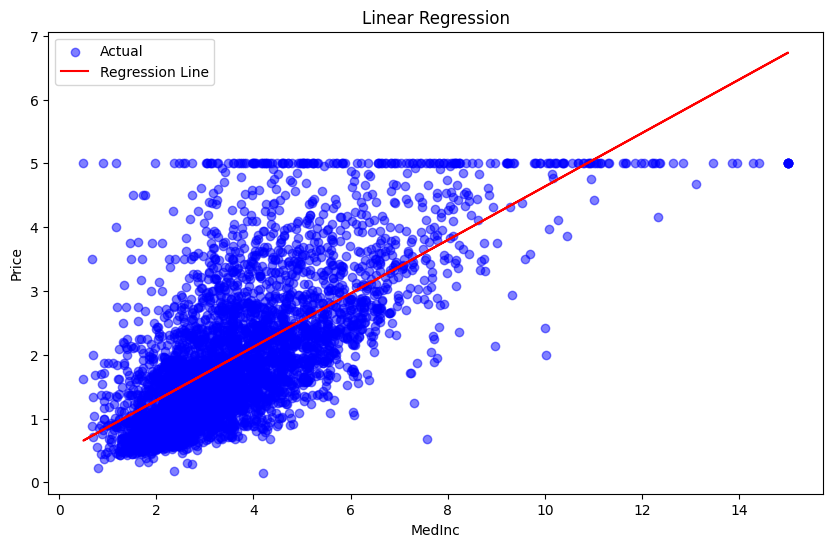

In [73]:
# Visualize
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='blue',label='Actual',alpha=0.5)
plt.plot(x_test,y_pred,color='red',label='Regression Line')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [78]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# generate synthetic data
x,y = make_regression(n_samples=100, n_features=2, noise=10)
# k- fold cross - validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
# perform cross - validation
scores = cross_val_score(model,x,y,scoring='r2',cv=kf)
print("Cross validation scores : ",scores)
print("Average score : ", scores.mean())


Cross validation scores :  [0.97917139 0.95371087 0.97051215 0.96653603 0.97297412]
Average score :  0.9685809125551572
